Dataset loaded successfully.
Starting data cleaning and standardization...
Data cleaning and standardization complete.

           STAGE 3: EXECUTION OF 9 ANALYTICAL QUESTIONS

Q1. Different Property Types (Room Type) and their Counts:
| Room Type       | Count   |
|:----------------|:--------|
| Entire home/apt | 5960    |
| Private room    | 4188    |
| Shared room     | 137     |
----------------------------------------------------------------------

Q2. Neighbourhood Group by Listing Count (Standardized):
| Neighbourhood Group   | Listing Count   |
|:----------------------|:----------------|
| Manhattan             | 4709            |
| Brooklyn              | 4619            |
| Queens                | 778             |
| Bronx                 | 129             |
| Staten Island         | 51              |
----------------------------------------------------------------------

Q3. Neighbourhood Group by Average Price (Standardized):
| Neighbourhood Group   | Average Price   |
|:--

/tmp/ipython-input-1244124091.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)
/tmp/ipython-input-1244124091.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method(

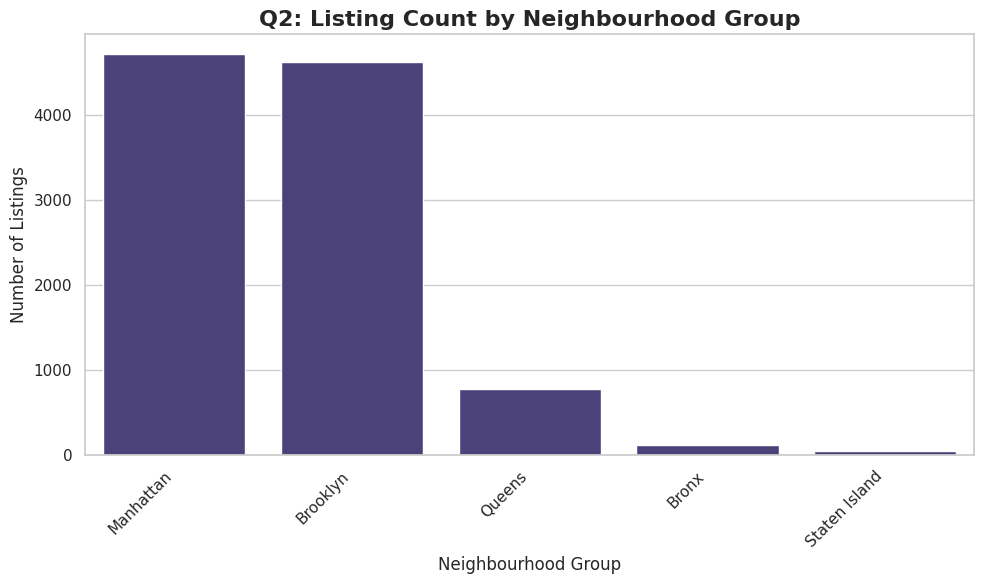

/tmp/ipython-input-1244124091.py:232: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Neighbourhood Group', y='Average Price', data=avg_prices, palette=[palette[1]])
/tmp/ipython-input-1244124091.py:232: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Neighbourhood Group', y='Average Price', data=avg_prices, palette=[palette[1]])


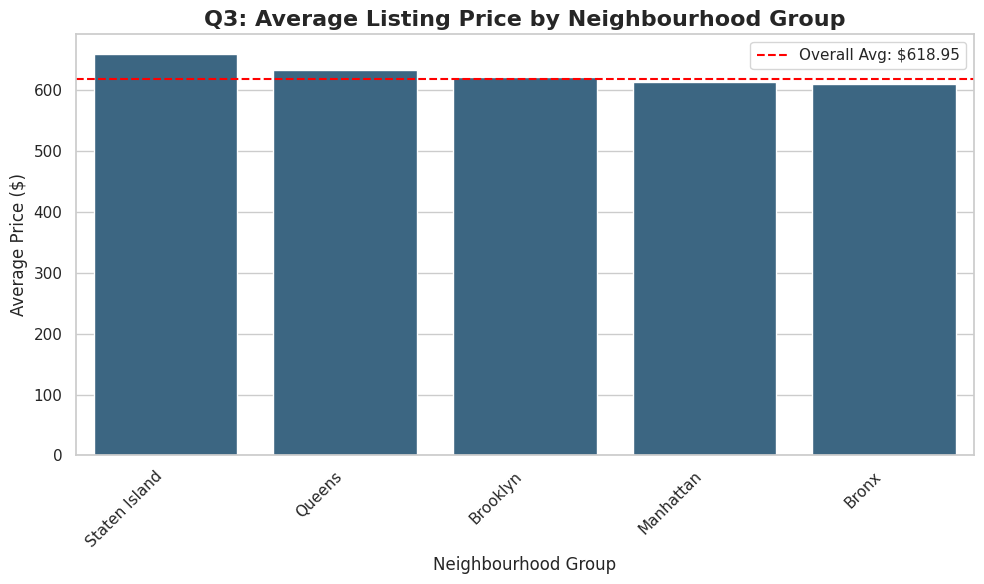

/tmp/ipython-input-1244124091.py:244: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Neighbourhood Group', y='Average Review Rate', data=avg_review_group, palette=[palette[2]])
/tmp/ipython-input-1244124091.py:244: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Neighbourhood Group', y='Average Review Rate', data=avg_review_group, palette=[palette[2]])


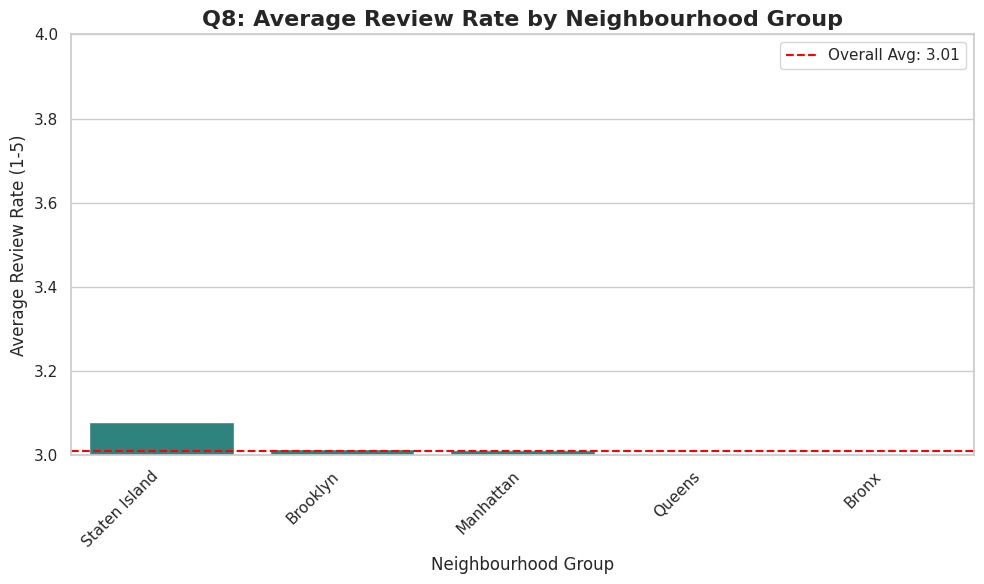

/tmp/ipython-input-1244124091.py:257: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Room Type', y='Average Review Rate', data=avg_review_room, palette="Set2")


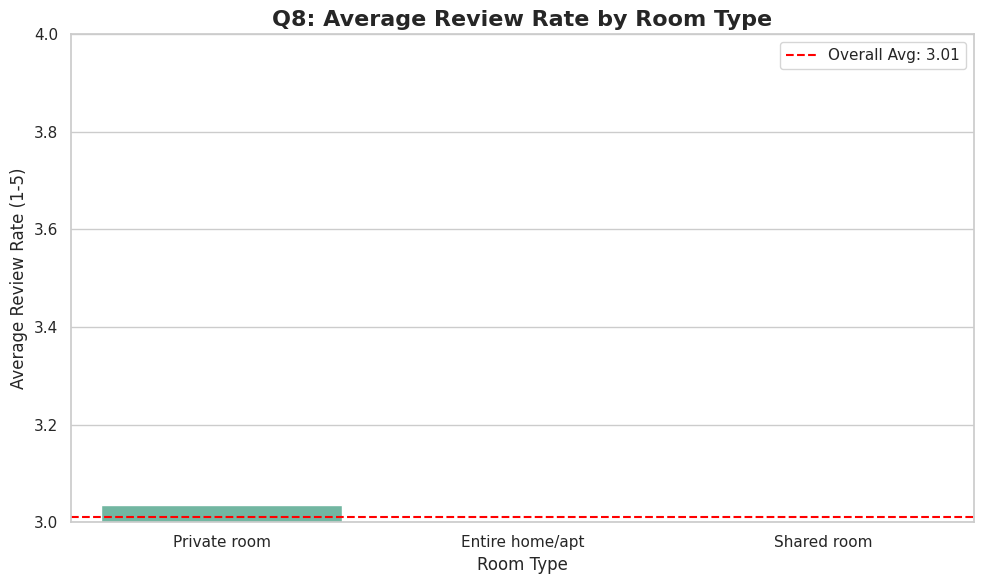

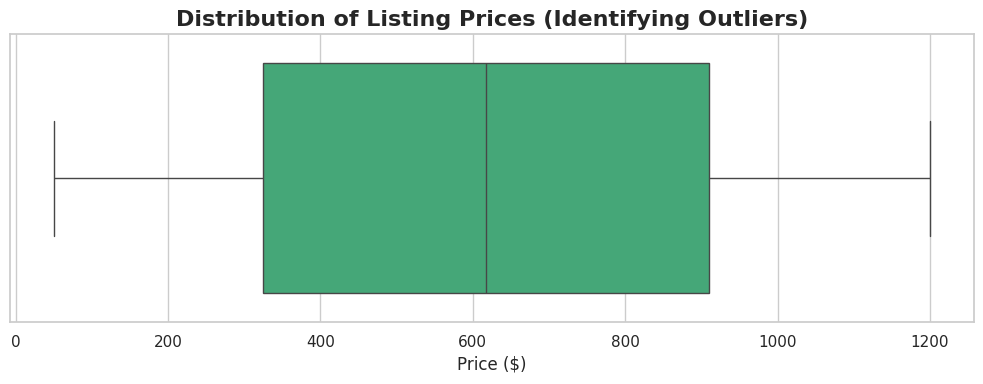

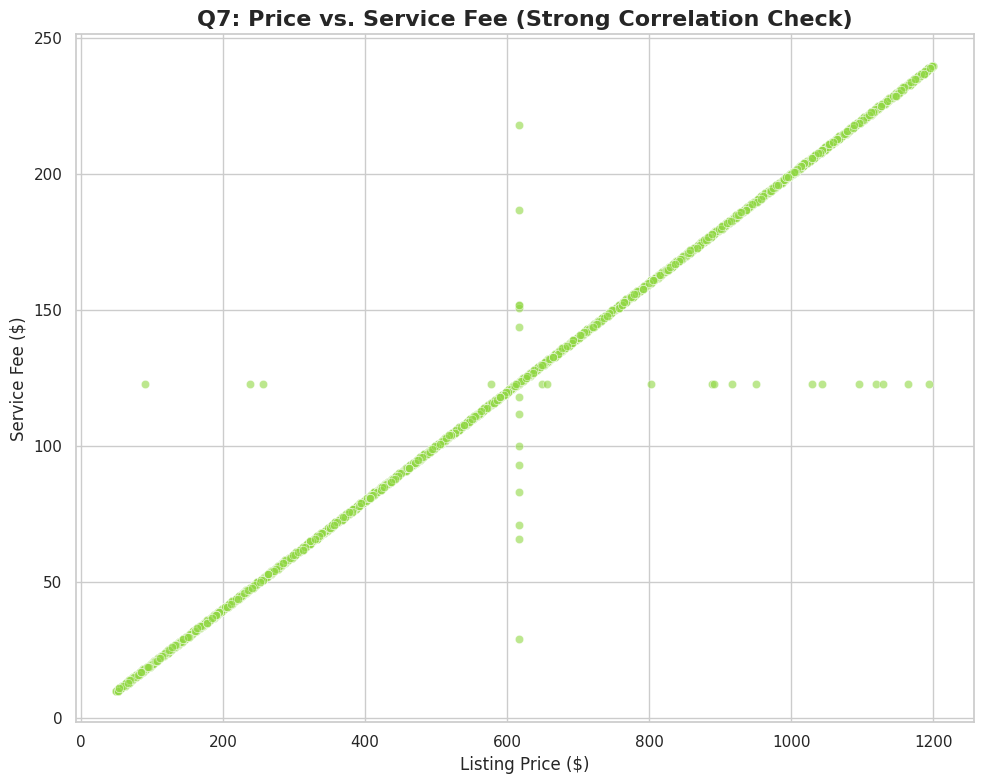

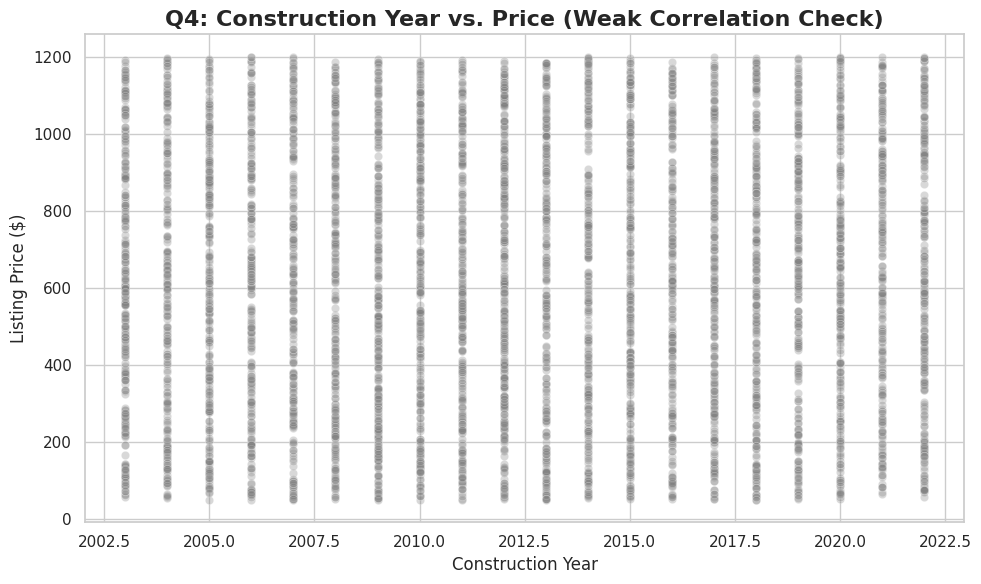


Visualizations displayed successfully (7 plots total).

All tasks (Cleaning, Analysis, and Visualization) are complete.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Imported Seaborn for better styling

# Set display options for better visibility of dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# --- GLOBAL PLOTTING SETUP (FIXED PALETTE ERROR) ---
# Define plotting style and color palette globally for accessibility in separate Colab cells
sns.set_theme(style="whitegrid")
palette = sns.color_palette("viridis", n_colors=5)
# ---------------------------------------------------

# --- 1. Load the Dataset ---
def load_data(filepath="/content/AirBNB_Open_Data.csv"):
    """Loads the dataset and handles file errors."""
    try:
        # Suppress DtypeWarning related to mixed types in unused column 25
        df = pd.read_csv(filepath)
        print("Dataset loaded successfully.")
        return df
    except FileNotFoundError:
        print(f"Error: '{filepath}' not found. Please ensure the file is uploaded to your Colab environment.")
        return None

# --- 2. Data Cleaning and Standardization ---
def clean_and_standardize_data(df):
    """Performs all cleaning, imputation, and standardization steps."""
    print("Starting data cleaning and standardization...")

    # A. Drop highly missing or text-heavy columns
    df.drop(columns=['license', 'house_rules'], inplace=True, errors='ignore')

    # B. Drop rows where 'neighbourhood group' is missing (critical feature for analysis)
    df.dropna(subset=['neighbourhood group'], inplace=True)

    # C. Handle ID columns (convert to string to prevent numerical issues)
    df['host id'] = df['host id'].astype(str)
    df['id'] = df['id'].astype(str)

    # D. Handle Review-related missing values (Impute with 0, convert 'last review' to datetime)
    review_cols = ['number of reviews', 'reviews per month']
    for col in review_cols:
        df[col].fillna(0, inplace=True)
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

    # E. Impute key numerical columns with the median
    numerical_cols = [
        'price',
        'service fee',
        'minimum nights',
        'Construction year',
        'instant_bookable',
        'review rate number',
        'calculated host listings count',
        'availability 365'
    ]

    for col in numerical_cols:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

    # F. Convert conceptually integer columns to integer type
    int_cols_to_convert = [
        'instant_bookable',
        'minimum nights',
        'Construction year',
        'number of reviews',
        'review rate number',
        'calculated host listings count',
        'availability 365'
    ]
    for col in int_cols_to_convert:
        # Use round(0) to handle float medians before conversion
        df[col] = df[col].round(0).astype(int)

    # G. Impute other categorical columns
    df['NAME'].fillna('Unknown Listing Name', inplace=True)
    df['host_identity_verified'].fillna('unconfirmed', inplace=True)
    df['host name'].fillna('Unknown Host', inplace=True)

    # H. Standardize 'neighbourhood group' (Fixing 'brookln' and 'manhatan')
    standardization_map = {
        'brookln': 'Brooklyn',
        'manhatan': 'Manhattan'
    }
    df['neighbourhood group'] = df['neighbourhood group'].replace(standardization_map)

    print("Data cleaning and standardization complete.")
    return df

# --- 3. Analysis Functions (The 9 Questions) ---

def run_analysis(df):
    """Executes all 9 analytical questions and prints results."""
    print("\n" + "="*70)
    print("           STAGE 3: EXECUTION OF 9 ANALYTICAL QUESTIONS")
    print("="*70)

    # Q1: What are the different property types (i.e., room type) in the Dataset?
    q1_result = df['room type'].value_counts().reset_index()
    q1_result.columns = ['Room Type', 'Count']
    print("\nQ1. Different Property Types (Room Type) and their Counts:")
    print(q1_result.to_markdown(index=False, numalign="left", stralign="left"))
    print("-" * 70)


    # Q2: Which neighborhood group has the highest number of listings?
    q2_result = df['neighbourhood group'].value_counts().reset_index()
    q2_result.columns = ['Neighbourhood Group', 'Listing Count']
    q2_result_sorted = q2_result.sort_values(by='Listing Count', ascending=False)
    print("\nQ2. Neighbourhood Group by Listing Count (Standardized):")
    print(q2_result_sorted.to_markdown(index=False, numalign="left", stralign="left"))
    print("-" * 70)


    # Q3: Which neighborhoods group have the highest average prices for Airbnb listings?
    q3_result = df.groupby('neighbourhood group')['price'].mean().reset_index()
    q3_result.columns = ['Neighbourhood Group', 'Average Price']
    q3_result_sorted = q3_result.sort_values(by='Average Price', ascending=False)
    q3_result_sorted['Average Price'] = q3_result_sorted['Average Price'].map('${:,.2f}'.format)
    # Store numerical data for plotting
    q3_plot_data = df.groupby('neighbourhood group')['price'].mean().reset_index()
    q3_plot_data.columns = ['Neighbourhood Group', 'Average Price']
    q3_plot_data.sort_values(by='Average Price', ascending=False, inplace=True)

    print("\nQ3. Neighbourhood Group by Average Price (Standardized):")
    print(q3_result_sorted.to_markdown(index=False, numalign="left", stralign="left"))
    print("-" * 70)


    # Q4: Is there a relationship between the construction year of property and price?
    q4_correlation = df[['Construction year', 'price']].corr().iloc[0, 1]
    print("\nQ4. Correlation between Construction Year and Price:")
    print(f"Pearson Correlation Coefficient: {q4_correlation:.4f}")
    print("Interpretation: Correlation is near zero, indicating no linear relationship.")
    print("-" * 70)


    # Q5: Who are the top 10 hosts by calculated host listing count?
    q5_df = df.groupby('host name')['id'].nunique().reset_index(name='Actual Listing Count')
    q5_top10 = q5_df.sort_values(by='Actual Listing Count', ascending=False).head(10).reset_index(drop=True)
    print("\nQ5. Top 10 Hosts by Actual Listing Count:")
    print(q5_top10.to_markdown(index=True, numalign="left", stralign="left"))
    print("-" * 70)


    # Q6: Are hosts with verified identities more likely to receive positive reviews?
    q6_result = df.groupby('host_identity_verified')['review rate number'].mean().reset_index()
    q6_result.columns = ['Host Identity Verified', 'Average Review Rate Number']
    q6_result_sorted = q6_result.sort_values(by='Average Review Rate Number', ascending=False)
    q6_result_sorted['Average Review Rate Number'] = q6_result_sorted['Average Review Rate Number'].map('{:.4f}'.format)
    print("\nQ6. Average Review Rate Number by Host Identity Verification Status:")
    print(q6_result_sorted.to_markdown(index=False, numalign="left", stralign="left"))
    print("-" * 70)


    # Q7: Is there a correlation between the price of a listing and its service fee?
    q7_correlation = df[['price', 'service fee']].corr().iloc[0, 1]
    print("\nQ7. Correlation between Price and Service Fee:")
    print(f"Pearson Correlation Coefficient: {q7_correlation:.4f}")
    print("Interpretation: Extremely high correlation, suggesting the fee is a fixed percentage of the price.")
    print("-" * 70)


    # Q8: What is the average review rate number(e.g.stars) for listings, and does it vary based on the neighborhood group and room type?
    overall_avg_review_rate = df['review rate number'].mean()

    q8_avg_group = df.groupby('neighbourhood group')['review rate number'].mean().reset_index()
    q8_avg_group.columns = ['Neighbourhood Group', 'Average Review Rate']
    q8_avg_group_sorted = q8_avg_group.sort_values(by='Average Review Rate', ascending=False)
    q8_avg_group_sorted['Average Review Rate'] = q8_avg_group_sorted['Average Review Rate'].map('{:.4f}'.format)

    # Store numerical data for plotting
    q8_plot_group_data = df.groupby('neighbourhood group')['review rate number'].mean().reset_index()
    q8_plot_group_data.columns = ['Neighbourhood Group', 'Average Review Rate']
    q8_plot_group_data.sort_values(by='Average Review Rate', ascending=False, inplace=True)

    q8_avg_room = df.groupby('room type')['review rate number'].mean().reset_index()
    q8_avg_room.columns = ['Room Type', 'Average Review Rate']
    q8_avg_room_sorted = q8_avg_room.sort_values(by='Average Review Rate', ascending=False)
    q8_avg_room_sorted['Average Review Rate'] = q8_avg_room_sorted['Average Review Rate'].map('{:.4f}'.format)

    # Store numerical data for plotting
    q8_plot_room_data = df.groupby('room type')['review rate number'].mean().reset_index()
    q8_plot_room_data.columns = ['Room Type', 'Average Review Rate']
    q8_plot_room_data.sort_values(by='Average Review Rate', ascending=False, inplace=True)


    print("\nQ8. Review Rate Analysis:")
    print(f"Overall Average Review Rate: {overall_avg_review_rate:.4f}")
    print("\nAverage Review Rate by Neighbourhood Group (Standardized):")
    print(q8_avg_group_sorted.to_markdown(index=False, numalign="left", stralign="left"))
    print("\nAverage Review Rate by Room Type:")
    print(q8_avg_room_sorted.to_markdown(index=False, numalign="left", stralign="left"))
    print("-" * 70)


    # Q9: Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
    q9_correlation = df[['calculated host listings count', 'availability 365']].corr().iloc[0, 1]
    print("\nQ9. Correlation between Calculated Host Listings Count and Availability 365:")
    print(f"Pearson Correlation Coefficient: {q9_correlation:.4f}")
    print("Interpretation: Weak positive correlation, suggesting a slight tendency for professional hosts to have higher availability.")
    print("=" * 70)

    # Return dataframes needed for the 7 visualizations, plus the overall average review rate
    return q2_result_sorted, q3_plot_data, q8_plot_group_data, q8_plot_room_data, df[['price']], df[['price', 'service fee']], df[['Construction year', 'price']], overall_avg_review_rate

# --- 4. Visualization Functions (Updated to 7 Plots) ---

def generate_visualizations(listing_counts, avg_prices, avg_review_group, avg_review_room, price_df, price_service_df, year_price_df, avg_review_rate):
    """Generates and displays the seven key visualizations using Seaborn."""
    print("\n" + "="*70)
    print("           STAGE 4: VISUALIZATION GENERATION (7 Plots)")
    print("="*70)

    # Plot 1 (Q2): Listing Count by Neighbourhood Group
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Neighbourhood Group', y='Listing Count', data=listing_counts, palette=[palette[0]])
    plt.title('Q2: Listing Count by Neighbourhood Group', fontsize=16, fontweight='bold')
    plt.xlabel('Neighbourhood Group', fontsize=12)
    plt.ylabel('Number of Listings', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Plot 2 (Q3): Average Price by Neighbourhood Group
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Neighbourhood Group', y='Average Price', data=avg_prices, palette=[palette[1]])
    plt.title('Q3: Average Listing Price by Neighbourhood Group', fontsize=16, fontweight='bold')
    plt.xlabel('Neighbourhood Group', fontsize=12)
    plt.ylabel('Average Price ($)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.axhline(price_df['price'].mean(), color='red', linestyle='--', linewidth=1.5, label=f'Overall Avg: ${price_df["price"].mean():.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot 3 (Q8 - Part 1): Average Review Rate by Neighbourhood Group
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Neighbourhood Group', y='Average Review Rate', data=avg_review_group, palette=[palette[2]])
    plt.title('Q8: Average Review Rate by Neighbourhood Group', fontsize=16, fontweight='bold')
    plt.xlabel('Neighbourhood Group', fontsize=12)
    plt.ylabel('Average Review Rate (1-5)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(3.0, 4.0) # Adjusted y-limit for better contrast
    plt.axhline(avg_review_rate, color='red', linestyle='--', linewidth=1.5, label=f'Overall Avg: {avg_review_rate:.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot 4 (Q8 - Part 2): Average Review Rate by Room Type
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Room Type', y='Average Review Rate', data=avg_review_room, palette="Set2")
    plt.title('Q8: Average Review Rate by Room Type', fontsize=16, fontweight='bold')
    plt.xlabel('Room Type', fontsize=12)
    plt.ylabel('Average Review Rate (1-5)', fontsize=12)
    plt.ylim(3.0, 4.0) # Adjusted y-limit for better contrast
    plt.axhline(avg_review_rate, color='red', linestyle='--', linewidth=1.5, label=f'Overall Avg: {avg_review_rate:.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- New Visualizations ---

    # Plot 5 (General): Price Distribution (Box Plot to check for outliers)
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=price_df['price'], color=palette[3])
    plt.title('Distribution of Listing Prices (Identifying Outliers)', fontsize=16, fontweight='bold')
    plt.xlabel('Price ($)', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Plot 6 (Q7): Price vs. Service Fee (Scatter Plot)
    plt.figure(figsize=(10, 8))
    # Sample a smaller set for better visualization, as the dataset is large
    sample_df = price_service_df.sample(n=5000, random_state=42)
    sns.scatterplot(x=sample_df['price'], y=sample_df['service fee'], alpha=0.6, color=palette[4])
    plt.title('Q7: Price vs. Service Fee (Strong Correlation Check)', fontsize=16, fontweight='bold')
    plt.xlabel('Listing Price ($)', fontsize=12)
    plt.ylabel('Service Fee ($)', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Plot 7 (Q4): Construction Year vs. Price (Scatter Plot)
    plt.figure(figsize=(10, 6))
    # Sample a smaller set for visualization clarity
    sample_df_year = year_price_df.sample(n=5000, random_state=42)
    sns.scatterplot(x=sample_df_year['Construction year'], y=sample_df_year['price'], alpha=0.3, color='grey')
    plt.title('Q4: Construction Year vs. Price (Weak Correlation Check)', fontsize=16, fontweight='bold')
    plt.xlabel('Construction Year', fontsize=12)
    plt.ylabel('Listing Price ($)', fontsize=12)
    plt.tight_layout()
    plt.show()

    print("\nVisualizations displayed successfully (7 plots total).")
    print("="*70)

# --- 5. Main Execution Block ---

if __name__ == "__main__":
    df = load_data()

    if df is not None:
        df = clean_and_standardize_data(df)

        # Run analysis and get data needed for visualizations (and overall avg rate)
        q2_data, q3_data, q8_group_data, q8_room_data, price_df, price_service_df, year_price_df, avg_review_rate = run_analysis(df)

        # Generate visualizations
        generate_visualizations(q2_data, q3_data, q8_group_data, q8_room_data, price_df, price_service_df, year_price_df, avg_review_rate)

        print("\nAll tasks (Cleaning, Analysis, and Visualization) are complete.")